In [2]:
import pandas as pd
import datetime
import time
import matplotlib.pyplot as plt

In [3]:
shotlog = "shot_logs.csv"

In [4]:
shotlogdf = pd.read_csv(shotlog)
shotlogdf.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [5]:
shotlogdf["GAME_CLOCK"] = shotlogdf['GAME_CLOCK'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

In [6]:
shotlog4 = shotlogdf.loc[(shotlogdf["PERIOD"] == 4) & 
                         (shotlogdf["SHOT_RESULT"] == "missed") &
                         (shotlogdf["GAME_CLOCK"] < 60) &
                         (shotlogdf["FINAL_MARGIN"] < 3)
                         
                         ,:]
shotlog4.head()


,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
40,21400783,"FEB 10, 2015 - CHA vs. DET",H,L,-28,6,4,25,8.3,6,...,9.3,2,missed,"Jerebko, Jonas",201973,3.6,0,0,brian roberts,203148
54,21400768,"FEB 08, 2015 - CHA vs. IND",H,L,-1,14,4,1,NaN,5,...,34.4,3,missed,"Hill, George",201588,3.6,0,0,brian roberts,203148
66,21400761,"FEB 07, 2015 - CHA @ PHI",A,L,-8,12,4,56,20.2,3,...,28.0,3,missed,"Frazier, Tim",204025,5.3,0,0,brian roberts,203148
184,21400478,"DEC 31, 2014 - CHA @ HOU",A,L,-19,7,4,13,NaN,3,...,27.1,3,missed,"Canaan, Isaiah",203477,5.6,0,0,brian roberts,203148
271,21400224,"NOV 28, 2014 - CHA vs. GSW",H,L,-5,11,4,57,23.4,0,...,19.3,2,missed,"Iguodala, Andre",2738,11.2,0,0,brian roberts,203148


In [11]:
shotlog4 = shotlogdf.loc[(shotlogdf["PERIOD"] == 4) & 
                         (shotlogdf["SHOT_RESULT"] == "missed") &
                         (shotlogdf["GAME_CLOCK"] < 60) &
                         (shotlogdf["FINAL_MARGIN"] < 3) 
                         
                         ,:]
shotlog4.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
40,21400783,"FEB 10, 2015 - CHA vs. DET",H,L,-28,6,4,25,8.3,6,...,9.3,2,missed,"Jerebko, Jonas",201973,3.6,0,0,brian roberts,203148
54,21400768,"FEB 08, 2015 - CHA vs. IND",H,L,-1,14,4,1,NaN,5,...,34.4,3,missed,"Hill, George",201588,3.6,0,0,brian roberts,203148
66,21400761,"FEB 07, 2015 - CHA @ PHI",A,L,-8,12,4,56,20.2,3,...,28.0,3,missed,"Frazier, Tim",204025,5.3,0,0,brian roberts,203148
184,21400478,"DEC 31, 2014 - CHA @ HOU",A,L,-19,7,4,13,NaN,3,...,27.1,3,missed,"Canaan, Isaiah",203477,5.6,0,0,brian roberts,203148
271,21400224,"NOV 28, 2014 - CHA vs. GSW",H,L,-5,11,4,57,23.4,0,...,19.3,2,missed,"Iguodala, Andre",2738,11.2,0,0,brian roberts,203148


In [12]:
shots = shotlog4['player_name'].value_counts()
shots = shots.head(10)
shots = pd.DataFrame(shots)
shots.reset_index(inplace=True)
shots

,index,player_name
0,damian lillard,23
1,kemba walker,20
2,carmelo anthony,19
3,kobe bryant,19
4,tyreke evans,17
5,trey burke,17
6,brandon knight,16
7,jeff green,16
8,derrick rose,16
9,reggie jackson,15


In [21]:
my_colors = 'rgbkymc'
shots.plot.bar(x="index", y="player_name",  color= my_colors)
plt.title("Least Clutch Shooter")
plt.grid(which='major', linewidth=.25)
plt.legend(["Player"], loc=0)
plt.xlabel("Players")
plt.ylabel("Missed Shots")

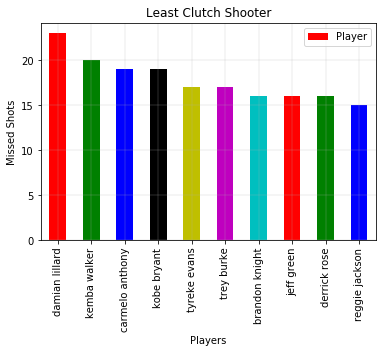

In [22]:
plt.savefig("LeastClutchShooter.png")
plt.show()